In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
colnames = ['Reference', 'Price', 'Date','Postcode', 'Property type', 'Old or New', 'Hold', 'House number', '% Attending Good or Outstanding secondary schools (ofstead)', '% Attending Good or Outstanding primary schools (ofstead)','Zone','Town','Borough', 'County', 'Ammended1', 'Ammed2' ]
df = pd.read_csv("pp-monthly.csv", names = colnames, header=None)
is_london = df[df['County']=='GREATER LONDON']

In [3]:
#Get rid of very early dates
is_london= is_london[is_london['Date']>='2005-01-01']

#convert date to int
is_london['Date'] = pd.to_datetime(df['Date']).astype(np.int64)


#Schools data from https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/545507/Ofsted_Annual_Report_201213_London.pdf

In [4]:
is_london.loc[(is_london['Borough']=='BARKING AND DAGENHAM'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=90
is_london.loc[(is_london['Borough']=='BARNET'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=98
is_london.loc[(is_london['Borough']=='BEXLEY'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=86
is_london.loc[(is_london['Borough']=='BRENT'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=86
                  
is_london.loc[(is_london['Borough']=='BROMLEY'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=89
is_london.loc[(is_london['Borough']=='CAMDEN'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=100

is_london.loc[(is_london['Borough']=='CITY OF LONDON'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=100
is_london.loc[(is_london['Borough']=='CITY OF WESTMINSTER'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=100
is_london.loc[(is_london['Borough']=='EALING'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=73
is_london.loc[(is_london['Borough']=='ENFIELD'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=86

is_london.loc[(is_london['Borough']=='GREENWICH'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=74
is_london.loc[(is_london['Borough']=='HACKNEY'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=99
is_london.loc[(is_london['Borough']=='HAMMERSMITH AND FULHAM'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=100
is_london.loc[(is_london['Borough']=='HARROW'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=94
is_london.loc[(is_london['Borough']=='HAVERING'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=73
is_london.loc[(is_london['Borough']=='HILLINGDON'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=81

is_london.loc[(is_london['Borough']=='CROYDON'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=69
is_london.loc[(is_london['Borough']=='HARINGEY'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=98

is_london.loc[(is_london['Borough']=='HOUNSLOW'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=100
is_london.loc[(is_london['Borough']=='ISLINGTON'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=100
is_london.loc[(is_london['Borough']=='KENSINGTON AND CHELSEA'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=100
is_london.loc[(is_london['Borough']=='KINGSTON UPON THAMES'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=84
is_london.loc[(is_london['Borough']=='LAMBETH'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=74
is_london.loc[(is_london['Borough']=='LEWISHAM'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=77

is_london.loc[(is_london['Borough']=='MERTON'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=70
is_london.loc[(is_london['Borough']=='NEWHAM'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=78
is_london.loc[(is_london['Borough']=='REDBRIDGE'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=87
is_london.loc[(is_london['Borough']=='RICHMOND UPON THAMES'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=87
is_london.loc[(is_london['Borough']=='SOUTHWARK'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=95
is_london.loc[(is_london['Borough']=='SUTTON'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=94
is_london.loc[(is_london['Borough']=='TOWER HAMLETS'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=100
is_london.loc[(is_london['Borough']=='WALTHAM FOREST'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=91
is_london.loc[(is_london['Borough']=='WANDSWORTH'),'% Attending Good or Outstanding secondary schools (ofstead)' ]=93

In [46]:
uniqueValues = is_london['Property type'].unique()
is_london.loc[(is_london['Property type']=='D'), 'Property score']=1
is_london.loc[(is_london['Property type']=='S'), 'Property score']=0.8
is_london.loc[(is_london['Property type']=='T'), 'Property score']=0.5
is_london.loc[(is_london['Property type']=='F'), 'Property score']=0.5
is_london.loc[(is_london['Property type']=='O'), 'Property score']=0.1


# Get names of indexes for which property type is O
indexNames = is_london[ is_london['Property type']=='O'].index
 
# Delete these row indexes from dataFrame (This includes warehouses and car garages- skewing results massively)
is_london.drop(indexNames , inplace=True)
 
uniqueValues


array(['F', 'D', 'T', 'S'], dtype=object)

In [47]:
convert_dict = {'% Attending Good or Outstanding secondary schools (ofstead)': int} 
is_london = is_london.astype(convert_dict) 

In [48]:
is_london = is_london[is_london['Price']>=100000]
is_london.describe()

,Price,Date,% Attending Good or Outstanding secondary schools (ofstead),% Attending Good or Outstanding primary schools (ofstead),Zone,Property score
count,1.023700e+04,1.023700e+04,10237.000000,10237.000000,10237.000000,10237.000000
mean,6.395809e+05,1.569323e+18,87.317476,83.168213,3.580346,0.561600
std,1.026297e+06,3.537641e+16,10.357540,7.368081,1.548461,0.137184
min,1.000000e+05,1.118102e+18,69.000000,62.000000,1.000000,0.500000
25%,3.375000e+05,1.572912e+18,77.000000,77.000000,2.000000,0.500000
50%,4.550000e+05,1.576022e+18,89.000000,85.000000,3.000000,0.500000
75%,6.621190e+05,1.576800e+18,98.000000,89.000000,5.000000,0.500000
max,5.000000e+07,1.580083e+18,100.000000,94.000000,6.000000,1.000000


In [49]:
barking_and_dagenham= is_london[is_london['Borough']=='BARKING AND DAGENHAM']
barnet= is_london[is_london['Borough']=='BARNET']
bexley= is_london[is_london['Borough']=='BEXELY']
brent= is_london[is_london['Borough']=='BRENT']
                  
bromely= is_london[is_london['Borough']=='BROMLEY']
camden= is_london[is_london['Borough']=='CAMDEN']

city_of_london= is_london[is_london['Borough']=='CITY OF LONDON']
city_of_westminster= is_london[is_london['Borough']=='CITY OF WESTMINSTER']
croydon=[is_london['Borough']=='CROYDON']
ealing= is_london[is_london['Borough']=='EALING']
enfield= is_london[is_london['Borough']=='ENFIELD']

greenwich= is_london[is_london['Borough']=='GREENWICH']
hackney= is_london[is_london['Borough']=='HACKNEY']
hammersmith_and_fulham= is_london[is_london['Borough']=='HAMMERSMITH AND FULHAM']
harrow= is_london[is_london['Borough']=='HARROW']
harvering= is_london[is_london['Borough']=='HAVERING']
hillingdon= is_london[is_london['Borough']=='HILLINGDON']

hounslow= is_london[is_london['Borough']=='HOUNSLOW']
islington= is_london[is_london['Borough']=='ISLINGTON']
kensington_and_chelsea= is_london[is_london['Borough']=='KENSINGTON AND CHELSEA']
kingston_upon_thames= is_london[is_london['Borough']=='KINGSTON UPON THAMES']
lambeth= is_london[is_london['Borough']=='LAMBETH']
lewisham= is_london[is_london['Borough']=='LEWISHAM']

merton= is_london[is_london['Borough']=='MERTON']
newham= is_london[is_london['Borough']=='NEWHAM']
redbridge= is_london[is_london['Borough']=='REDBRIDGE']
richmond_upon_thames= is_london[is_london['Borough']=='RICHMOND UPON THAMES']
southwark= is_london[is_london['Borough']=='SOUTHWARK']
sutton= is_london[is_london['Borough']=='SUTTON']

tower_hamlets= is_london[is_london['Borough']=='TOWER HAMLETS']
waltham_forest= is_london[is_london['Borough']=='WALTHAM FOREST']
wandsworth= is_london[is_london['Borough']=='WANDSWORTH']

In [50]:

uniqueValues = is_london['Borough'].unique()

In [51]:
len(uniqueValues)

33

In [52]:
southwark.describe()

,Price,Date,% Attending Good or Outstanding secondary schools (ofstead),% Attending Good or Outstanding primary schools (ofstead),Zone,Property score
count,3.420000e+02,3.420000e+02,342.0,342.0,342.0,342.000000
mean,5.918097e+05,1.568429e+18,95.0,86.0,2.0,0.507895
std,3.203317e+05,3.322390e+16,0.0,0.0,0.0,0.048092
min,1.147500e+05,1.178842e+18,95.0,86.0,2.0,0.500000
25%,4.000000e+05,1.570147e+18,95.0,86.0,2.0,0.500000
50%,5.312500e+05,1.575504e+18,95.0,86.0,2.0,0.500000
75%,6.837500e+05,1.576714e+18,95.0,86.0,2.0,0.500000
max,3.100000e+06,1.579824e+18,95.0,86.0,2.0,0.800000


In [53]:
hounslow.describe()

,Price,Date,% Attending Good or Outstanding secondary schools (ofstead),% Attending Good or Outstanding primary schools (ofstead),Zone,Property score
count,2.810000e+02,2.810000e+02,281.0,281.0,281.0,281.000000
mean,5.288716e+05,1.570791e+18,100.0,76.0,4.0,0.571174
std,4.159684e+05,3.676768e+16,0.0,0.0,0.0,0.133316
min,1.162500e+05,1.140134e+18,100.0,76.0,4.0,0.500000
25%,3.075000e+05,1.574122e+18,100.0,76.0,4.0,0.500000
50%,4.125000e+05,1.575936e+18,100.0,76.0,4.0,0.500000
75%,5.900000e+05,1.576800e+18,100.0,76.0,4.0,0.500000
max,4.600000e+06,1.579824e+18,100.0,76.0,4.0,1.000000


In [54]:
is_london.loc[(is_london['Borough'] == 'LAMBETH')|(is_london['Borough'] == 'CITY OF WESTMINSTER')|(is_london['Borough'] == 'CITY OF LONDON'),'Zone'] = 1

is_london.loc[(is_london['Borough'] == 'CAMDEN')|(is_london['Borough'] == 'SOUTHWARK')|(is_london['Borough'] == 'HACKNEY')|(is_london['Borough'] == 'HAMMERSMITH AND FULHAM')| (is_london['Borough'] == 'ISLINGTON')| (is_london['Borough'] == 'KENSINGTON AND CHELSEA')| (is_london['Borough'] == 'TOWER HAMLETS'),'Zone'] = 2

is_london.loc[(is_london['Borough'] == 'GREENWICH')|(is_london['Borough'] == 'LEWISHAM'),'Zone'] = 2.5

is_london.loc[(is_london['Borough'] == 'EALING')|(is_london['Borough'] == 'HARINGEY')|(is_london['Borough'] == 'NEWHAM')| (is_london['Borough'] == 'WANDSWORTH')|(is_london['Borough'] == 'WALTHAM FOREST'),'Zone'] = 3

is_london.loc[(is_london['Borough'] == 'BRENT')|(is_london['Borough'] == 'MERTON')|(is_london['Borough'] == 'REDBRIDGE')| (is_london['Borough'] == 'RICHMOND UPON THAMES')| (is_london['Borough'] == 'HOUNSLOW'),'Zone'] = 4

is_london.loc[(is_london['Borough'] == 'BARKING AND DAGENHAM')|(is_london['Borough'] == 'BROMLEY')|(is_london['Borough'] == 'CROYDON')| (is_london['Borough'] == 'HARROW')| (is_london['Borough'] == 'SUTTON')|(is_london['Borough'] == 'ENFIELD')|(is_london['Borough'] == 'BARNET')  ,'Zone'] = 5

is_london.loc[(is_london['Borough'] == 'BEXLEY')|(is_london['Borough'] == 'HAVERING')| (is_london['Borough'] == 'HILLINGDON')| (is_london['Borough'] == 'KINGSTON UPON THAMES') ,'Zone'] = 6

In [55]:
is_london

,Reference,Price,Date,Postcode,Property type,Old or New,Hold,House number,% Attending Good or Outstanding secondary schools (ofstead),% Attending Good or Outstanding primary schools (ofstead),Zone,Town,Borough,County,Ammended1,Ammed2,Property score
193,{9DBAD222-4BCD-6EB3-E053-6B04A8C0F257},234995,1165881600000000000,SE7 8QS,F,Y,L,110,74,82,2.5,LONDON,GREENWICH,GREATER LONDON,A,A,0.5
208,{4A196847-D9FE-4AF6-B168-3CE91B340491},142000,1164240000000000000,SE25 5DP,F,N,L,59B,69,72,5.0,LONDON,CROYDON,GREATER LONDON,A,C,0.5
211,{D6249CBD-1BA4-4047-BD0B-538DCA9B16F8},230000,1138924800000000000,N16 8AT,F,N,L,48,99,85,2.0,LONDON,HACKNEY,GREATER LONDON,A,C,0.5
214,{43E92FEC-3E01-482C-A445-6E5E0123AB9F},249995,1152489600000000000,E1 3NE,F,N,L,41,100,87,2.0,LONDON,TOWER HAMLETS,GREATER LONDON,A,C,0.5
220,{0459BE45-CA52-4ECC-A671-AC425D6F95DA},345000,1154390400000000000,HA2 7RE,D,N,F,60,94,91,5.0,HARROW,HARROW,GREATER LONDON,A,C,1.0
221,{48F33A79-0F8C-4C88-86E7-B7E99A7A0242},294000,1138147200000000000,W5 3LA,F,N,L,WOLVERTON MANSIONS,73,89,3.0,LONDON,EALING,GREATER LONDON,A,C,0.5
229,{7D26BC08-5BD0-48BB-B735-23CAB6B94948},265000,1155859200000000000,W7 2ET,T,N,F,68,73,89,3.0,LONDON,EALING,GREATER LONDON,A,C,0.5
231,{2CC00C0F-85B5-4BDF-8D33-5FAC8C14DEDF},325000,1166140800000000000,SE19 1JU,F,N,L,5,74,90,1.0,LONDON,LAMBETH,GREATER LONDON,A,C,0.5
232,{EA08EAF3-2787-4A1A-8539-8089858E6618},725000,1149465600000000000,W14 0HH,F,N,L,220,100,89,2.0,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,A,C,0.5
252,{43BAD124-28F9-44C9-BB5F-A12E06A4ABB6},630000,1142985600000000000,SW17 8RW,T,N,F,38,93,94,3.0,LONDON,WANDSWORTH,GREATER LONDON,A,C,0.5


In [56]:
import seaborn as sns

In [57]:
is_london.dtypes

Reference                                                       object
Price                                                            int64
Date                                                             int64
Postcode                                                        object
Property type                                                   object
Old or New                                                      object
Hold                                                            object
House number                                                    object
% Attending Good or Outstanding secondary schools (ofstead)      int64
% Attending Good or Outstanding primary schools (ofstead)        int64
Zone                                                           float64
Town                                                            object
Borough                                                         object
County                                                          object
Ammend

In [58]:
convert_dict = {'Zone': int} 
is_london = is_london.astype(convert_dict) 

In [59]:
is_london.loc[(is_london['Borough']=='BARKING AND DAGENHAM'),'% Attending Good or Outstanding primary schools (ofstead)' ]=62
is_london.loc[(is_london['Borough']=='BARNET'),'% Attending Good or Outstanding primary schools (ofstead)' ]=89
is_london.loc[(is_london['Borough']=='BEXLEY'),'% Attending Good or Outstanding primary schools (ofstead)' ]=83
is_london.loc[(is_london['Borough']=='BRENT'),'% Attending Good or Outstanding primary schools (ofstead)' ]=76
                  
is_london.loc[(is_london['Borough']=='BROMLEY'),'% Attending Good or Outstanding primary schools (ofstead)' ]=75
is_london.loc[(is_london['Borough']=='CAMDEN'),'% Attending Good or Outstanding primary schools (ofstead)' ]=94

is_london.loc[(is_london['Borough']=='CITY OF LONDON'),'% Attending Good or Outstanding primary schools (ofstead)' ]=85
is_london.loc[(is_london['Borough']=='CITY OF WESTMINSTER'),'% Attending Good or Outstanding primary schools (ofstead)' ]=79
is_london.loc[(is_london['Borough']=='EALING'),'% Attending Good or Outstanding primary schools (ofstead)' ]=89
is_london.loc[(is_london['Borough']=='ENFIELD'),'% Attending Good or Outstanding primary schools (ofstead)' ]=73

is_london.loc[(is_london['Borough']=='GREENWICH'),'% Attending Good or Outstanding primary schools (ofstead)' ]=82
is_london.loc[(is_london['Borough']=='HACKNEY'),'% Attending Good or Outstanding primary schools (ofstead)' ]=85
is_london.loc[(is_london['Borough']=='HAMMERSMITH AND FULHAM'),'% Attending Good or Outstanding primary schools (ofstead)' ]=89
is_london.loc[(is_london['Borough']=='HARROW'),'% Attending Good or Outstanding primary schools (ofstead)' ]=91
is_london.loc[(is_london['Borough']=='HAVERING'),'% Attending Good or Outstanding primary schools (ofstead)' ]=80
is_london.loc[(is_london['Borough']=='HILLINGDON'),'% Attending Good or Outstanding primary schools (ofstead)' ]=79

is_london.loc[(is_london['Borough']=='CROYDON'),'% Attending Good or Outstanding primary schools (ofstead)' ]=72
is_london.loc[(is_london['Borough']=='HARINGEY'),'% Attending Good or Outstanding primary schools (ofstead)' ]=85

is_london.loc[(is_london['Borough']=='HOUNSLOW'),'% Attending Good or Outstanding primary schools (ofstead)' ]=76
is_london.loc[(is_london['Borough']=='ISLINGTON'),'% Attending Good or Outstanding primary schools (ofstead)' ]=89
is_london.loc[(is_london['Borough']=='KENSINGTON AND CHELSEA'),'% Attending Good or Outstanding primary schools (ofstead)' ]=79
is_london.loc[(is_london['Borough']=='KINGSTON UPON THAMES'),'% Attending Good or Outstanding primary schools (ofstead)' ]=79
is_london.loc[(is_london['Borough']=='LAMBETH'),'% Attending Good or Outstanding primary schools (ofstead)' ]=90
is_london.loc[(is_london['Borough']=='LEWISHAM'),'% Attending Good or Outstanding primary schools (ofstead)' ]=89

is_london.loc[(is_london['Borough']=='MERTON'),'% Attending Good or Outstanding primary schools (ofstead)' ]=82
is_london.loc[(is_london['Borough']=='NEWHAM'),'% Attending Good or Outstanding primary schools (ofstead)' ]=87
is_london.loc[(is_london['Borough']=='REDBRIDGE'),'% Attending Good or Outstanding primary schools (ofstead)' ]=73
is_london.loc[(is_london['Borough']=='RICHMOND UPON THAMES'),'% Attending Good or Outstanding primary schools (ofstead)' ]=94
is_london.loc[(is_london['Borough']=='SOUTHWARK'),'% Attending Good or Outstanding primary schools (ofstead)' ]=86
is_london.loc[(is_london['Borough']=='SUTTON'),'% Attending Good or Outstanding primary schools (ofstead)' ]=94
is_london.loc[(is_london['Borough']=='TOWER HAMLETS'),'% Attending Good or Outstanding primary schools (ofstead)' ]=87
is_london.loc[(is_london['Borough']=='WALTHAM FOREST'),'% Attending Good or Outstanding primary schools (ofstead)' ]=77
is_london.loc[(is_london['Borough']=='WANDSWORTH'),'% Attending Good or Outstanding primary schools (ofstead)' ]=94

convert_dict = {'% Attending Good or Outstanding primary schools (ofstead)': int} 
is_london = is_london.astype(convert_dict) 

In [60]:
is_london.dtypes

Reference                                                       object
Price                                                            int64
Date                                                             int64
Postcode                                                        object
Property type                                                   object
Old or New                                                      object
Hold                                                            object
House number                                                    object
% Attending Good or Outstanding secondary schools (ofstead)      int64
% Attending Good or Outstanding primary schools (ofstead)        int64
Zone                                                             int64
Town                                                            object
Borough                                                         object
County                                                          object
Ammend

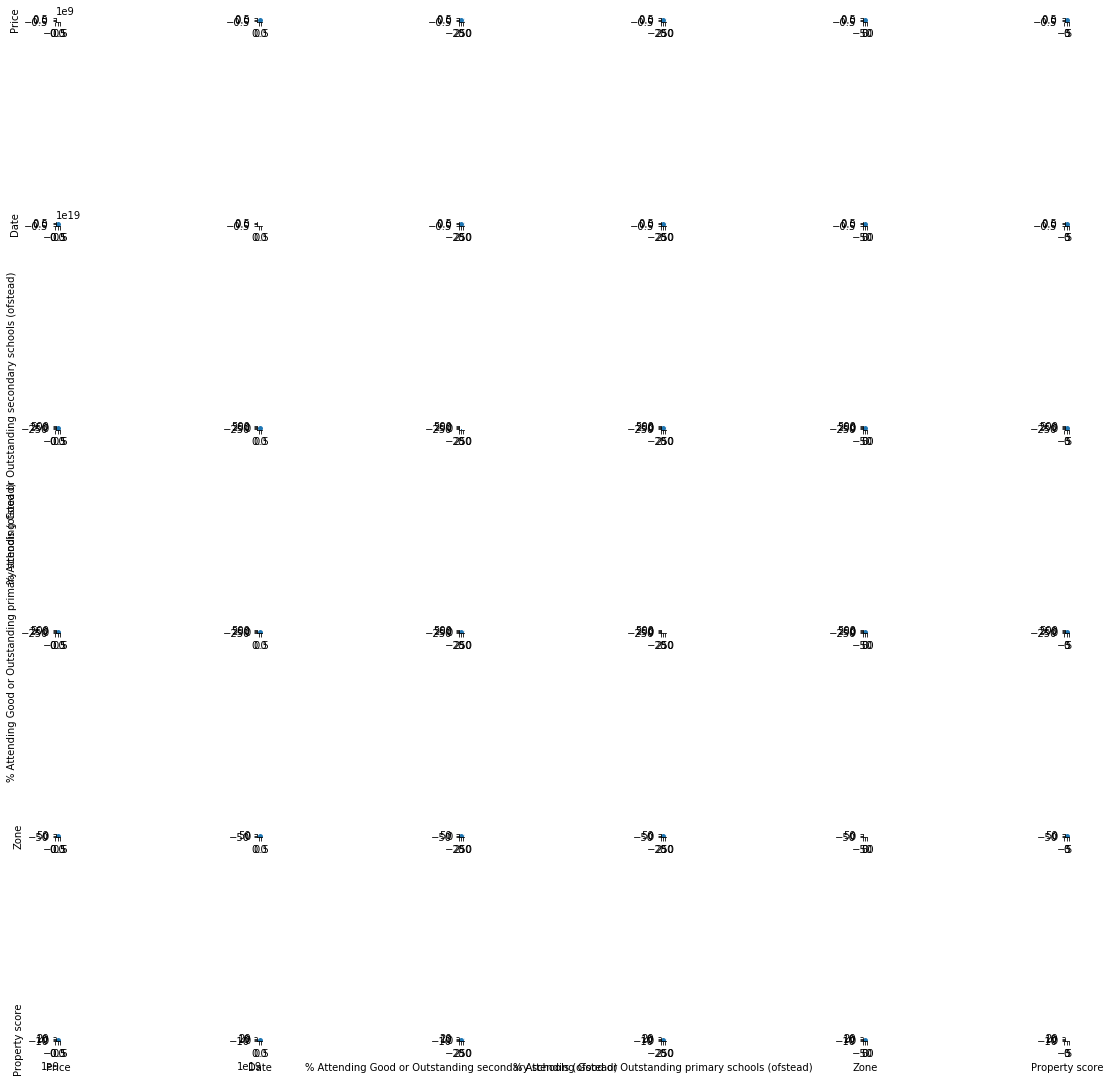

In [61]:
sns.pairplot(is_london)

In [62]:
corrmat=is_london.corr()

In [45]:
corrmat
#Very little correlation between zone and price ffs, going to have to find a way to do conditioning on zone and borough

,Price,Date,% Attending Good or Outstanding secondary schools (ofstead),% Attending Good or Outstanding primary schools (ofstead),Zone,Property score
Price,1.000000,0.016283,0.172480,0.040852,-0.206640,0.056306
Date,0.016283,1.000000,-0.027664,-0.056010,0.084003,0.052279
% Attending Good or Outstanding secondary schools (ofstead),0.172480,-0.027664,1.000000,0.199963,-0.249374,-0.135339
% Attending Good or Outstanding primary schools (ofstead),0.040852,-0.056010,0.199963,1.000000,-0.383650,-0.126980
Zone,-0.206640,0.084003,-0.249374,-0.383650,1.000000,0.349727
Property score,0.056306,0.052279,-0.135339,-0.126980,0.349727,1.000000


In [26]:


# The strongest correlation we see is between zone and education standard